## **Consigna:** 
Implementar al menos uno de los algoritmos de clasificación vistos en la sesión de hoy con el dataset propuesto para el proyecto final del curso. 

> ### **Dataset Elegido**


El dataset eligido es el de **Employee Attrition**, con el cual se trabajó para la entrega de la clase "*Workshop Análisis Multivariado*". 


Para evitar ser redundante con el análisis de los datos, se deja link de GitHub con la entrega anterior:
https://github.com/chinchugram/Coder/blob/main/Entrega1_Di_Giacomo_+_Cortez%20(1).ipynb

Cabe destacar que este dataset ya tiene un proceso de Data Wrangling realizado de antemano.


Por otro lado, por una cuestión de practicidad y para simplificar el colab, se dejarán los datos en su idioma original.

> ### **Tipo de problema a resolver**

Para este ejercicio, mediante un aprendizaje supervisado, se abordará el dataset como un "*Problema de Clasificación*", es decir que se necesita predecir la clase más probable de un elemento en función de un conjunto de variables de entrada.


La variable target será la columna "*Attrition*", que es del tipo categórica. 

## **Dataset + Variable Target**

In [1]:
#importa las librerias
import numpy as np
import pandas as pd
import matplotlib as mpl 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#trae el dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [3]:
#verifica el shape
df.shape

(1470, 35)

In [4]:
#analiza el tipo de dato
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

## **Preparación del dataset para usar en los modelos**

In [5]:
#importa librerias
from sklearn.model_selection import train_test_split #separar en train y test
from sklearn.metrics import accuracy_score           #calcular la metrica accuracy



---


Para poder trabajar con el dataset, necesitamos convertir las variables categoricas en variables indicadoras. 

Para hacer esto, se utiliza el método **pd.get_dummies()** , cuya función es generar un DataFrame con nombres de columnas ficticias formado por la concatenación del nombre de la columna original y cada valor único de la columna.

---

In [6]:
df_dummy = pd.get_dummies(df, drop_first=True)
df_dummy.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,49,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,37,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,27,591,2,1,1,7,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0


In [7]:
#Separamos el dataset en X e Y
X = df_dummy.drop("Attrition_Yes", axis=1) #Elimino de mi dataset la variable a predecir
Y = df_dummy.Attrition_Yes                 #Defino la variable target del modelo

In [8]:
#Se define que sera 30% para test y 70% para train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

## **Arbol de Decisión**

In [9]:
#importa el modelo de Arbol de Decision
from sklearn.tree import DecisionTreeClassifier      

In [10]:
#Crea el modelo de Arbol de Decision
dt_df = DecisionTreeClassifier(max_depth=2, random_state = 42) 

#Entrena el modelo
dt_df.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [11]:
#Realiza precciones
Y_train_pred = dt_df.predict(X_train) #en Train
Y_test_pred = dt_df.predict(X_test)   #en Test

In [12]:
#Metrica accuracy
dt_train_accuracy = accuracy_score(Y_train, Y_train_pred) #Accuracy en Train
dt_test_accuracy = accuracy_score(Y_test, Y_test_pred)    #Accuracy en Test

#Devuelve por mensaje de consola los resultados obtenidos
print('% de aciertos sobre el set de entrenamiento:', dt_train_accuracy)
print('% de aciertos sobre el set de evaluación:',dt_test_accuracy)

% de aciertos sobre el set de entrenamiento: 0.8551992225461613
% de aciertos sobre el set de evaluación: 0.8616780045351474


## **Random Forest**

In [13]:
#importa la libreria
from sklearn.ensemble import RandomForestClassifier

In [14]:
#Crea el modelo de Random Forest
rf_df = RandomForestClassifier(random_state=11, n_estimators=200, class_weight="balanced", max_features="log2")

#Entrena el Modelo
rf_df.fit(X_train, Y_train)

RandomForestClassifier(class_weight='balanced', max_features='log2',
                       n_estimators=200, random_state=11)

In [15]:
#Realiza predicciones en test
Y_test_pred = rf_df.predict(X_test)

In [16]:
#Calculo el accuracy en Test
rf_test_accuracy = accuracy_score(Y_test, Y_test_pred)

print('% de aciertos sobre el set de evaluación:',rf_test_accuracy)

% de aciertos sobre el set de evaluación: 0.8707482993197279


## **Regresión Logística**

In [17]:
#importa la libreria
from sklearn.linear_model import LogisticRegression

In [18]:
#Crea el modelo de Regresion logica
lr_df = LogisticRegression()

#Entrena el Modelo
lr_df.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [19]:
#Realiza predicciones en test
Y_test_pred = lr_df.predict(X_test)

In [20]:
#Calculo el accuracy en Test
lr_test_accuracy = accuracy_score(Y_test, Y_test_pred)

print('% de aciertos sobre el set de evaluación:',lr_test_accuracy)

% de aciertos sobre el set de evaluación: 0.8639455782312925


## **K-Nearest-Neighbor (KNN)**

In [21]:
#importa la libreria
from sklearn.neighbors import KNeighborsClassifier

In [22]:
#Crea el modelo de KNN
knn_df = KNeighborsClassifier(n_neighbors=5)

#Entrena el Modelo
knn_df.fit(X_train, Y_train)

KNeighborsClassifier()

In [23]:
#Realiza predicciones en test
Y_test_pred = knn_df.predict(X_test)

In [25]:
#Calculo el accuracy en Test
knn_test_accuracy = accuracy_score(Y_test, Y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', knn_test_accuracy)

% de aciertos sobre el set de entrenamiento: 0.8276643990929705


## **Gráfico Comparativo**

In [26]:
#DataFrame comparativo
modelo = pd.Series(['Arbol de Decision','Random Forest','Regresion Logica','KNN'])
resultadoTest = pd.Series([dt_test_accuracy,rf_test_accuracy,lr_test_accuracy,knn_test_accuracy])

performance = pd.DataFrame({'Modelo':modelo,'%_Acierto_Test':resultadoTest}).sort_values(by='%_Acierto_Test', ascending=False)
performance

,Modelo,%_Acierto_Test
1,Random Forest,0.870748
2,Regresion Logica,0.863946
0,Arbol de Decision,0.861678
3,KNN,0.827664


In [27]:
#parametros de visualizacion
sns.set_theme(style="darkgrid")
mpl.rcParams['axes.titlesize'] = 14
mpl.rcParams['axes.titleweight'] = 'bold'
mpl.rcParams['axes.labelcolor'] = 'grey'

[Text(0, 0.5, '% de acierto'),
 Text(0.5, 0, 'Modelo'),
 Text(0.5, 1.0, 'Performance de los Modelos')]

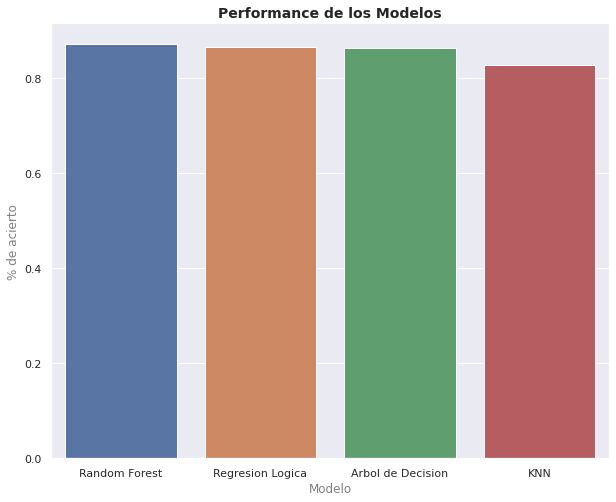

In [28]:
#Crea un grafico de barras con los porcentajes de acierto de cada modelo.
fig,axes = plt.subplots(figsize = (10,8))
ax = sns.barplot(data=performance, x='Modelo',y='%_Acierto_Test', order=performance.sort_values('%_Acierto_Test',ascending=False).Modelo)
ax.set(title='Performance de los Modelos',xlabel='Modelo',ylabel= '% de acierto')

## **Conclusiones:**
El modelo Random Forest fue el que tuvo un mayor porcentaje de acierto en comparación con el resto, siendo KNN el del porcentaje menor.